## 개념 정리
### 용어 정리
- 가중치 시각화
    - 합성곱 층의 가중치를 이미지로 출력하는 것
    - 합성곱 신경망은 주로 이미지를 다루기 때문에, 가중치가 시각적인 패턴을 학습하는지 알아볼 수 있음
- 특성맵 시각화
    - 합성곱 층의 활성화 출력을 이미지로 그리는 것을 말함.
    - 가중치 시각화와 함께 비교하여 각 필터가 이미지의 어느부분을 활성화시키는지 확인가능
- 함수형 API
    - 케라스에서 신경망 모델을 만드는 방법 중 하나
    - Model 클래스에 모델의 입력과 출력을 지정
    - 전형적으로 입력은 Input()을 사용하여 정의하고 출력은 마지막 층의 출력으로 정의
### 핵심 패키지와 함수 (Tensorflow)
- Model
    - 케라스 모델을 만드는 클래스
    - inputs: 모델의 입력 또는 입력의 리스트를 지정
    - outputs: 모델의 출력 또는 출력의 리스트를 지정
    - name: 모델의 이름을 지정

[<keras.layers.convolutional.Conv2D object at 0x0000027C30C54FD0>, <keras.layers.pooling.MaxPooling2D object at 0x0000027C30D6A550>, <keras.layers.convolutional.Conv2D object at 0x0000027C36E98430>, <keras.layers.pooling.MaxPooling2D object at 0x0000027C36ECE790>, <keras.layers.core.flatten.Flatten object at 0x0000027C36ED65E0>, <keras.layers.core.dense.Dense object at 0x0000027C36ED6B50>, <keras.layers.core.dropout.Dropout object at 0x0000027C36EDD370>, <keras.layers.core.dense.Dense object at 0x0000027C36EDD460>]
(3, 3, 1, 32) (32,)
<built-in method mean of numpy.ndarray object at 0x0000027C3705A270> 0.28134724


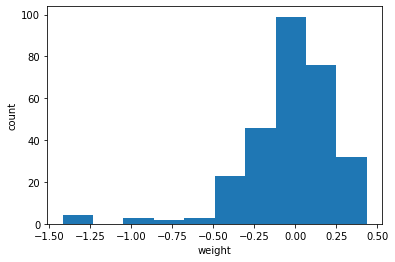

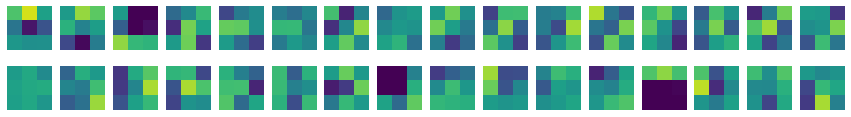

(3, 3, 1, 32)
0.0055946964 0.079546474


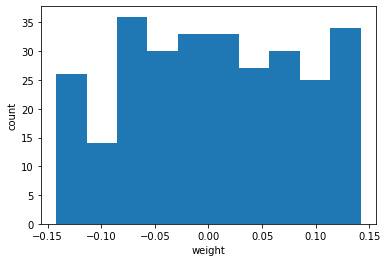

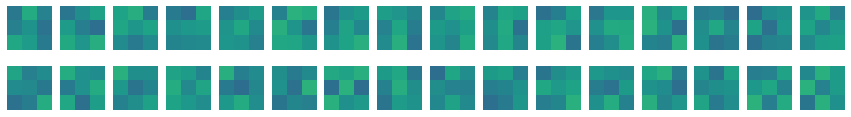

In [1]:
'''모델정보 불러들이고 확인하기'''
# 이전 장에서 얻은 모델 정보를 불러들임
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

# 모델의 layer 정보를 출력
print(model.layers)

# 첫번째 합성곱층의 가중치 구해보기
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape) # 첫번째 원소는 가중치의 크기, 두번째 원소는 절편의 갯수를 나타냄. 필터마다 하나씩 절편이 존재하므로, (32,)의 형태를 띄게 됨.

# 첫번째 합성곱층의 가중치의 평균과 표준편차 구하기
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean, conv_weights.std())

# 첫번째 합성곱층의 가중치 정보 시각화
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

# 32개의 커널을 16개씩 2줄로 시각화
fig, axs = plt.subplots(2,16, figsize = (15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5) # conv_weights[:,:,0,0] ~ [:,:,0,31]까지 출력
        # 가중치가 높은 값이 밝은 색을 띔. 만약 데이터와 밝은 필터 부분이 만나면, 밝은쪽을 만난 부분의 데이터가 더 활성화 되는 결과를 보일 것임.
        axs[i,j].axis('off')
plt.show()

'''빈 합성곱 신경망을 통해 가중치 살펴보기'''
# 빈 합성곱 신경망 만들기
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same',input_shape=(28,28,1)))

# 합성곱의 가중치 정보 저장
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape) # (3,3) 커널을 가진 필터를 32개 사용했음 -> (3,3,1,32)

# 합성곱 가중치의 평균과 표준편차 구하기
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(),no_training_weights.std())

# 가중치 배열을 히스토그램으로 시각화
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show() # 신경망의 가중치를 초기화할 때, 균등 분포에서 랜덤하게 고르기 때문에 균등한 모습을 보임.

# 32개의 커널을 16개씩 2줄로 시각화
fig, axs = plt.subplots(2,16, figsize = (15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5) # conv_weights[:,:,0,0] ~ [:,:,0,31]까지 출력
        # 가중치가 높은 값이 밝은 색을 띔. 만약 데이터와 밝은 필터 부분이 만나면, 밝은쪽을 만난 부분의 데이터가 더 활성화 되는 결과를 보일 것임.
        axs[i,j].axis('off')
plt.show()

In [2]:
'''함수형 API'''
# 층을 미리 정의하고, 이를 함수로써 사용가능함.
# 입력값은 keras.Input()을 통해 전달하고, 그 값을 다음 층으로 넘김.
# 다음 층에선 그 다음층으로 값을 넘김.
# 모델을 선언할 때는, keras.Model()로 선언하고, 처음 들어갈 변수와 최종 결과 변수를 매개변수로 받음
'''
# 밀집층 정의
dense1 = keras.layers.Dense(100, activation = 'sigmoid')
dense2 = keras.layers.Dense(10, activation = 'softmax')

# 모델의 형태 정의
inputs = keras.Input(shape=(784,))
hidden = dense1(inputs)
outputs = dense2(hidden)
model = keras.Model(inputs, outputs)
'''

"\n# 밀집층 정의\ndense1 = keras.layers.Dense(100, activation = 'sigmoid')\ndense2 = keras.layers.Dense(10, activation = 'softmax')\n\n# 모델의 형태 정의\ninputs = keras.Input(shape=(784,))\nhidden = dense1(inputs)\noutputs = dense2(hidden)\nmodel = keras.Model(inputs, outputs)\n"

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


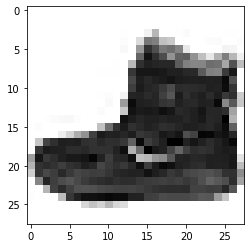

(1, 28, 28, 32)


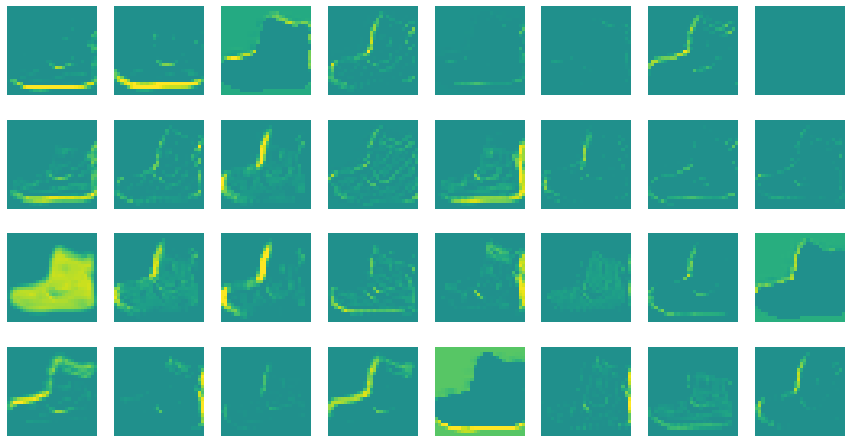

In [3]:
'''특성맵 시각화 #1: 첫번째 합성곱의 활성화 맵'''
# 새로운 모델을 정의해보기
print(model.input) # 모델 객체.input 으로 모델 객체의 입력값을 받을 수 있음
conv_acti = keras.Model(model.input, model.layers[0].output) # 새로운 모델을 정의

# 데이터 불러오기
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 불러온 데이터 시각화
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

# 데이터 변환하기
inputs = train_input[0:1].reshape(-1,28, 28, 1) / 255.0

# 특성화맵 구하기
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

# 32개의 커널을 8개씩 4줄로 시각화
fig, axs = plt.subplots(4,8, figsize = (15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j], vmin=-0.5, vmax=0.5) # conv_weights[:,:,0,0] ~ [:,:,0,31]까지 출력
        # 필터가 감지하는 영역에 따라, 특성화맵의 원소(그림)들도 각각 다른 모습을 보임.
        axs[i,j].axis('off')
plt.show()

(1, 14, 14, 64)


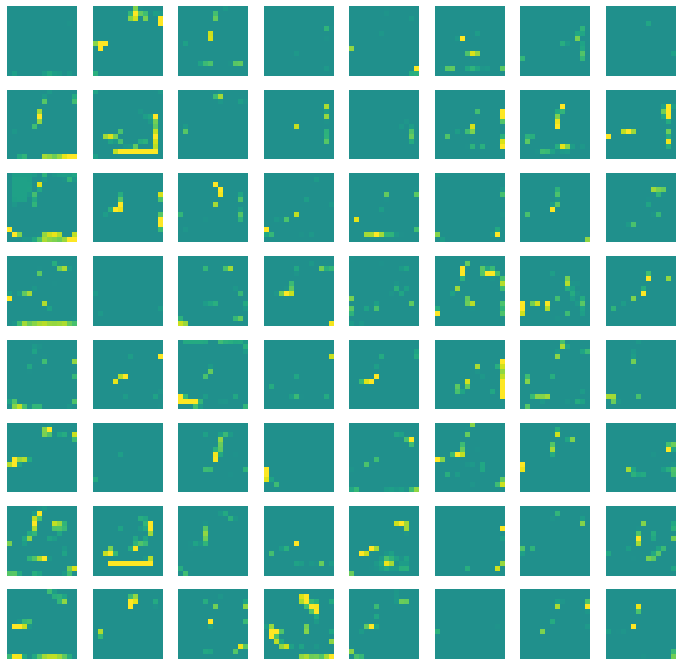

In [4]:
'''특성화 시각화 #2: 두번째 합성곱 층의 특성화맵'''
# 새로운 모델을 정의해보기
conv2_acti = keras.Model(model.input, model.layers[2].output)

# 데이터 변환하기
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0

# 특성화맵 구하기
feature_maps = conv2_acti.predict(inputs)
print(feature_maps.shape)

# 32개의 커널을 8개씩 8줄로 시각화
fig, axs = plt.subplots(8,8, figsize = (12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j], vmin=-0.5, vmax=0.5) # conv_weights[:,:,0,0] ~ [:,:,0,31]까지 출력
        # 신경망의 앞부분에 위치한 층은 시각적인 정보를 감지함.
        # 신경망 뒷부분에 위치한 층일 수록, 시각정보를 기반으로 한 추상적인 정보를 감지함.
        axs[i,j].axis('off')
plt.show()